In [1]:
import tensorflow as tf
import os
import cv2
import random
from imutils import paths
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
random.seed(42)

In [3]:
data=[]
labels=[]
flat_data=[]
image_path= sorted(list(paths.list_images('dataset/training_set')))
random.shuffle(image_path)

for path in image_path:
    image= cv2.imread(path)
    image= cv2.resize(image,(64,64))
    flat= cv2.resize(image,(64,64)).flatten()
    flat_data.append(flat)
    data.append(image)
    
    label= path.split(os.path.sep)[-2]
    labels.append(label)
    
flat_data= np.array(flat_data,dtype='float')/255
data= np.array(data,dtype='float')/255
labels= np.array(labels)

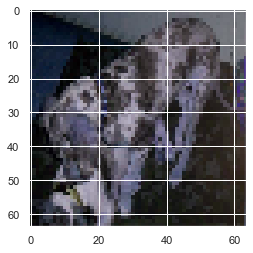

In [4]:
plt.imshow(data[3]);

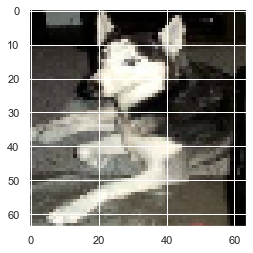

In [5]:
plt.imshow(data[2]);

In [6]:
labels

array(['cats', 'cats', 'dogs', ..., 'cats', 'cats', 'dogs'], dtype='<U4')

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [8]:
X_train,X_test,y_train,y_test= train_test_split(flat_data,labels,test_size=0.2,random_state=42)

In [9]:
le= LabelEncoder()

In [10]:
y_train= le.fit_transform(y_train)
y_test= le.transform(y_test)

In [11]:
X_train.shape

(3200, 12288)

In [12]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [13]:
def check_shape(df):
    shape= df.shape
    print('Shape of Data', shape)

In [14]:
check_shape(X_train)

Shape of Data (3200, 1, 12288)


In [15]:
check_shape(X_test)

Shape of Data (800, 1, 12288)


In [16]:
rnn= tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units=100,activation="relu",return_sequences = True,dropout=0.2),
    tf.keras.layers.SimpleRNN(units=70,activation="relu",return_sequences = True,dropout=0.2),
    tf.keras.layers.SimpleRNN(units=20,activation="relu",return_sequences = True,dropout=0.2),
    tf.keras.layers.SimpleRNN(units=10,activation="relu",return_sequences=False,dropout=0.2),
    tf.keras.layers.Dense(units=1,activation='sigmoid')
])

In [17]:
optimi='adam'
loss='binary_crossentropy',
metrics= ['accuracy']
epoch=50
batch_size=32

In [18]:
rnn.compile(optimizer=optimi,loss=loss,metrics=metrics)

In [19]:
h= rnn.fit(X_train,y_train,epochs=epoch,validation_data=(X_test,y_test),batch_size=batch_size)

Epoch 1/50
100/100 [==============================] - 12s 63ms/step - loss: 0.7689 - accuracy: 0.4849 - val_loss: 0.6933 - val_accuracy: 0.4950
Epoch 2/50
100/100 [==============================] - 4s 35ms/step - loss: 0.7177 - accuracy: 0.5061 - val_loss: 0.6939 - val_accuracy: 0.4913
Epoch 3/50
100/100 [==============================] - 3s 26ms/step - loss: 0.6999 - accuracy: 0.5055 - val_loss: 0.6941 - val_accuracy: 0.4913
Epoch 4/50
100/100 [==============================] - 3s 28ms/step - loss: 0.6974 - accuracy: 0.4837 - val_loss: 0.6941 - val_accuracy: 0.4913
Epoch 5/50
100/100 [==============================] - 3s 28ms/step - loss: 0.6958 - accuracy: 0.4930 - val_loss: 0.6936 - val_accuracy: 0.4938
Epoch 6/50
100/100 [==============================] - 3s 28ms/step - loss: 0.6937 - accuracy: 0.5019 - val_loss: 0.6939 - val_accuracy: 0.4913
Epoch 7/50
100/100 [==============================] - 3s 28ms/step - loss: 0.6949 - accuracy: 0.4900 - val_loss: 0.6933 - val_accuracy: 0.491

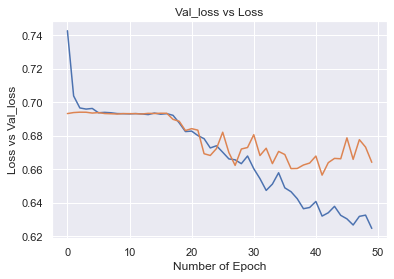

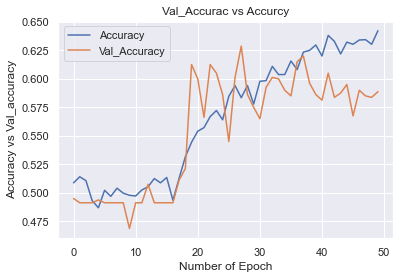

In [21]:
N= np.arange(0,epoch)
accuracy= h.history['accuracy']
loss= h.history['loss']
val_acc= h.history['val_accuracy']
val_loss= h.history['val_loss']


plt.figure()
plt.plot(N,loss,label= 'Loss')
plt.plot(N,val_loss,label='Val_loss')
plt.title('Val_loss vs Loss')
plt.xlabel('Number of Epoch')
plt.ylabel('Loss vs Val_loss')

plt.figure()
plt.plot(N,accuracy,label= 'Accuracy')
plt.plot(N,val_acc,label='Val_Accuracy')
plt.title('Val_Accurac vs Accurcy')
plt.xlabel('Number of Epoch')
plt.ylabel('Accuracy vs Val_accuracy')
plt.legend();
